# Phase 3 Project Tanzanian Water Wells

## Binary Logistic regression Model

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImPipeline

In [32]:
tz_data = pd.read_csv('train_data.csv')

In [33]:
data = tz_data.copy()

In [34]:
# dropping more columns for modeling
# Will be using age of well instead of constraction year for prediction
# Data's record doesn't seem important for modeling and dropping it for now
data = data.drop(['id', 'date_recorded', 'construction_year','recorded_by'], axis =1)

In [35]:
# Changing all T/F columns 
bool_columns = data.select_dtypes(include=bool).columns
data[bool_columns] = data[bool_columns].astype(int)

# Target
>- 0 = Needs Repair
>- 1 = Functional

In [37]:
data['status_group'].value_counts()

status_group
1    32259
0    27141
Name: count, dtype: int64

In [46]:
X = data.drop('status_group', axis=1)  
y = data['status_group']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 59400 non-null  object 
 1   gps_height             59400 non-null  int64  
 2   installer              59400 non-null  object 
 3   basin                  59400 non-null  object 
 4   region                 59400 non-null  object 
 5   population             59400 non-null  float64
 6   public_meeting         59400 non-null  int64  
 7   permit                 59400 non-null  int64  
 8   extraction_type_class  59400 non-null  object 
 9   management_group       59400 non-null  object 
 10  payment                59400 non-null  object 
 11  water_quality          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source                 59400 non-null  object 
 14  source_class           59400 non-null  object 
 15  wa

# Processing 
>- setting the columns based on their features for pipeline modeling

In [49]:
cat_cols = ['installer', 'funder', 'basin', 'management_group', 'extraction_type_class', 'payment', 'water_quality', 
              'quantity', 'source', 'source_class', 'waterpoint_type_group', 'region']

num_cols = ['gps_height', 'population', 'age_of_well']
bin_cols = ['permit', 'public_meeting']

In [ ]:
#A df to record results
data_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info'])

>- Transforming to a pipeline with OHE, scaler, imputer and polynomial features

In [50]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
    
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly',PolynomialFeatures(2)),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline([
    ('bin_impute', SimpleImputer(strategy='most_frequent'))
])

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols),
        ('bins',binary_transformer, bin_cols)
    ])

# Dummy model

In [52]:
Dummy_model = Pipeline(steps=[
    ('processes', preprocessor),
    ('classifier',DummyRegressor())
])

In [53]:
Dummy_model.fit(X_train, y_train)

Pipeline(steps=[('processes',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['installer', 'funder',
                                                   'basin', 'management_group',
                                                   'extraction_type_class',
                                                   'payment', 'water_quality',
                                                   'quantity', 'source',
                                                   'source_class',
                                                   'waterpoint_type_group',
                                                   'region']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'population',
                                                   'age_of_well']),
                                                 ('bins',
                                                  Pipeline(steps=[('bin_impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['permit',
                                                   'public_meeting'])])),
                ('classifier', DummyRegressor())])

In [54]:
Dummy_model.score(X_train, y_train)

0.0

In [55]:
Dummy_model.score(X_test, y_test)

-0.000126492738089512

## Logistic Regression
>- With random_state =42

In [60]:
Model_1 = Pipeline(steps=[
    ('processes', preprocessor),
    ('classifier', LogisticRegression(random_state =42))
])

In [61]:
Model_1.fit(X_train, y_train)

/Users/danayt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('processes',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['installer', 'funder',
                                                   'basin', 'management_group',
                                                   'extraction_type_class',
                                                   'payment', 'water_quality',
                                                   'quantity', 'source',
                                                   'source_class',
                                                   'waterpoint_type_group',
                                                   'region']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'population',
                                                   'age_of_well']),
                                                 ('bins',
                                                  Pipeline(steps=[('bin_impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['permit',
                                                   'public_meeting'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [68]:
y_pred_1 = Model_1.predict(X_test)

In [71]:
y_train_1 = Model_1.predict(X_train)
y_test_pred= Model_1.predict(X_test)

print("Accuracy:")
train_accuracy = accuracy_score(y_train, y_train_1)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_1)
print("Test Accuracy:", test_accuracy)

print("\nBalanced Accuracy:")
train_accuracy = balanced_accuracy_score(y_train, y_train_1)
print("Train Accuracy:", train_accuracy)

test_accuracy = balanced_accuracy_score(y_test, y_test_1)
print("Test Accuracy:", test_accuracy)

Accuracy:
Train Accuracy: 0.7485803306698829
Test Accuracy: 0.751147842056933

Balanced Accuracy:
Train Accuracy: 0.7381838952726794
Test Accuracy: 0.7392560039540049


In [73]:
print(classification_report(y_t_1, y_test_1)) 
cm = confusion_matrix(y_train_1, y_test_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [39798, 19602]

In [76]:
from sklearn.metrics import log_loss

y_train_pred_proba = Model_1.predict_proba(X_train)
y_test_pred_proba = Model_1.predict_proba(X_test)

train_log_loss = log_loss(y_train, y_train_pred_proba)
print("Train Log Loss:", train_log_loss)

test_log_loss = log_loss(y_test, y_test_pred_proba)
print("Test Log Loss:", test_log_loss)

Train Log Loss: 0.5005417088185962
Test Log Loss: 0.5001924868294715


Text(0.5, 0, 'False Positive Rate')

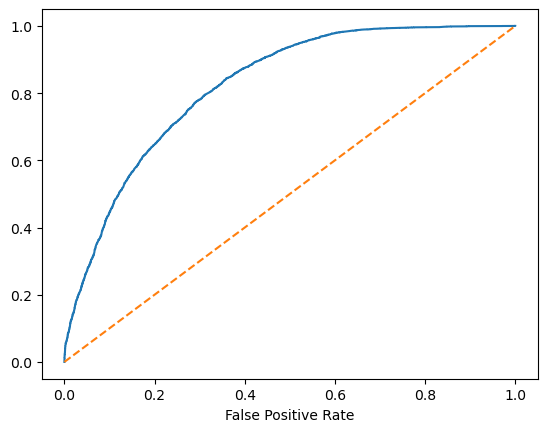

In [74]:
probs = Model_1.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')

# Grid Search 

In [48]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver':['lbfgs', 'liblinear'],
    'classifier__max_iter': [100, 1000, 10000],  
}

In [49]:
grid_search = GridSearchCV(Model, param_grid, cv= 5, verbose = 2, n_jobs=-1)

In [50]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/danayt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/danayt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processes',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['installer',
                                                                          'basin',
                                                                          'scheme_management',
                                                                          'extraction_type_class',
                                                                          'payment_type',
                                                                          'quality_group',
                                                                          'quantity_group',
                                                                          'source',
                                                                          'waterpoint_type_group']),
                                                                        ('num',
                                                                         P...
                                                                         Pipeline(steps=[('bin_impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['permit',
                                                                          'public_meeting'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__max_iter': [100, 1000, 10000],
                         'classifier__penalty': ['l2', 'l1'],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             verbose=2)

In [51]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("best_params:", best_params)

best_params: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [52]:
y_pred_gr = best_model.predict(X_test)

In [53]:
import numpy as np

unique_values = np.unique(y_train)
print(unique_values)

[0 1]


In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_fsm)

In [56]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Accuracy:")
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nBalanced Accuracy:")
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Accuracy:
Train Accuracy: 0.784109754259008
Test Accuracy: 0.7844097541067238

Balanced Accuracy:
Train Accuracy: 0.7641914416591423
Test Accuracy: 0.7638143166952325


In [95]:

importance = np.abs(Model.named_steps['classifier'].coef_[0])
feature_names = Model.named_steps['processes'].get_feature_names_out()
df_importance = pd.DataFrame({'Feature':feature_names, 'importance': importance})
df_importance = df_importance.sort_values(by='importance', ascending=False)
df_importance.head(50)

,Feature,importance
46,cat__quantity_group_dry,3.310739
53,cat__source_lake,1.274598
66,cat__waterpoint_type_group_other,1.268916
15,cat__scheme_management_Company,1.267376
82,num__latitude^2,1.266179
56,cat__source_rainwater harvesting,1.245141
47,cat__quantity_group_enough,1.226061
0,cat__installer_Commu,0.957997
49,cat__quantity_group_seasonal,0.941163
45,cat__quality_group_unknown,0.933865


In [92]:

# importance = np.abs(Model.named_steps['classifier'].coef_[0])
# ohe_feature_names = Model.named_steps['processes'].get_feature_names_out()
# original_feature_names = Model.named_steps['processes'].named_transformers_['cat'].get_feature_names_out(input_features=feature_names)

# # Create a DataFrame with original feature names and importance scores
# df = pd.DataFrame({'Feature': original_feature_names, 'Importance': importance})

# # Sort the DataFrame in descending order based on importance scores
# df = df.sort_values(by='Importance', ascending=False)

# # Select the top ten important features
# top_ten_features = df.head(10)

In [ ]:
data_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info'])

In [ ]:
results_1 = pd.DataFrame({       
     "Model": ['Dummyreggressor'],
      "test_balanced_acc": [0.5], 
       'train_balanced_acc' : [0.5],
               'info' : ['baseline']
})
data_results = pd.concat([data_results, results_1], ignore_index =True)

In [ ]:
results_2 = pd.DataFrame({       
     "Model": ['LogisticRegression'],
      "test_balanced_acc": [0.738], 
       'train_balanced_acc' : [0.737],
               'info' : ['fsm_pipeline'],
})
data_results = pd.concat([data_results, results_2], ignore_index =True)

In [ ]:
results_3 = pd.DataFrame({       
     "Model": ['LogisticRegression'],
      "test_balanced_acc": [0.765], 
       'train_balanced_acc' : [0.764],
               'info' : ['without funder and tsh_amount'],
})
data_results = pd.concat([data_results, results_3], ignore_index =True)

In [ ]:
results_4 = pd.DataFrame({       
     "Model": ['LogisticRegression'],
      "test_balanced_acc": [0.763], 
       'train_balanced_acc' : [0.76],
               'info' : ['grid search, best_params'],
})
data_results = pd.concat([data_results, results_4], ignore_index =True)

In [ ]:
results_5 = pd.DataFrame({       
     "Model": ['LogisticRegression'],
      "test_balanced_acc": [0.763], 
       'train_balanced_acc' : [0.763],
               'info' : ['SMOTE, best_params'],
})
data_results = pd.concat([data_results, results_5], ignore_index =True)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')

# Logistic regression With SMOTE
>- model performed well on training and the test, but the balanced accuracy is much lower meaning there's huge class imbalance
>- Below is the model with SMOTE

In [ ]:
Smote_model = ImPipeline(steps=[
    ('processes', preprocessor),
    ('sm', SMOTE(random_state = 42, n_jobs =-1)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced', random_state =42))
])

In [ ]:
best_param = {
    'classifier__C': [0.1],
    'classifier__penalty': ['l2'],
    'classifier__solver':['liblinear'],
    'classifier__max_iter': [100],  
}

In [ ]:
grid_search_smote = GridSearchCV(Smote_model, best_param, cv= 5, verbose = 2, n_jobs=-1)

In [ ]:
grid_search_smote.fit(X_train, y_train)

In [ ]:
best_model_smote = grid_search_smote.best_estimator_

In [ ]:
y_pred = best_model_smote.predict(X_test)

In [ ]:
y_train_pred = best_model_smote.predict(X_train)
y_test_pred = best_model_smote.predict(X_test)

print("Accuracy:")
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nBalanced Accuracy:")
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

In [ ]:
prediction_df = pd.DataFrame({'Predicted':y_pred})

In [ ]:
prediction_df

In [ ]:
data_results

In [ ]:
categorical_cols = ['installer', 'basin', 'scheme_management', 'extraction_type_class', 'payment_type', 'quality_group', 
              'quantity_group', 'source', 'waterpoint_type_group']

numeric_cols = ['gps_height', 'longitude', 'latitude','population', 'construction_year']
binary_cols = ['permit', 'public_meeting']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())  
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly',PolynomialFeatures(2)),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline([
    ('bin_impute', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
CT = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numeric_cols),
        ('bins',binary_transformer, binary_cols)
    ])

In [ ]:
Multiclass_Model = Pipeline(steps=[
    ('processes', CT),
    ('classifier', LogisticRegression(solver='lbfgs', class_weight='balanced', random_state =42))
])

In [ ]:
multiclass_param = {
    'classifier__C': [0.1],
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver':['liblinear', 'lbfgs'],
    'classifier__class_weight': ['balanced'],
    'classifier__max_iter': [100, 1000, 10000],
    
}

In [ ]:
grid_search_multiclass = GridSearchCV(Model, param_grid, cv= 5, verbose = 2, n_jobs=-1)
grid_search_multiclass.fit(X_train, y_train)

In [ ]:
best_model_m = grid_search_multiclass.best_estimator_
best_params_m = grid_search_multiclass.best_params_
y_pred_multiclass = grid_search_multiclass.predict(X_test)
y_pred_multiclass

In [ ]:
y_train_pred = best_model_m.predict(X_train_m)
y_test_pred = best_model_m.predict(X_test_m)

print("Accuracy:")
train_accuracy = accuracy_score(y_train_m, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test_m, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nBalanced Accuracy:")
train_accuracy = balanced_accuracy_score(y_train_m, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = balanced_accuracy_score(y_test_m, y_test_pred)
print("Test Accuracy:", test_accuracy)